In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [78]:
pd.set_option('display.max_columns',None)

In [79]:
df = pd.read_csv('/content/food_delivery.csv')

In [80]:
df.head()

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,actual_delivery_time,promised_delivery_time,order_delay,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
0,544145594,9/1/21 10:41,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,"134,69","119,7","14,99",Cash,1896.0,1739.0,157.0,3294.0,iOS,food,food,False,False,False,False,False,False,NaN,Chennai
1,544478492,9/1/21 18:17,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,"134,6454","129,6554","4,99",Cash,3506.0,2159.0,1347.0,1911.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
2,544358032,9/1/21 15:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,"84,49","79,5","4,99",Cash,3357.0,2159.0,1198.0,560.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
3,544366924,9/1/21 16:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,"320,013","310,023","9,99",Cash,3237.0,2519.0,718.0,1380.0,android,food,food,False,False,False,False,False,False,NaN,Chennai
4,544372362,9/1/21 16:16,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,"83,99",69,"14,99",Online - Card,1216.0,1499.0,-283.0,1902.0,android,food,food,False,False,False,False,False,False,NaN,Chennai


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119885 entries, 0 to 119884
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    119885 non-null  int64  
 1   order_time                  119885 non-null  object 
 2   analytical_customer_id      119885 non-null  object 
 3   is_acquisition              119885 non-null  bool   
 4   is_successful               119885 non-null  bool   
 5   reason                      19716 non-null   object 
 6   sub_reason                  8348 non-null    object 
 7   owner                       19716 non-null   object 
 8   delivery_arrangement        119885 non-null  object 
 9   gmv_amount_lc               119885 non-null  object 
 10  basket_amount_lc            119885 non-null  object 
 11  delivery_fee_amount_lc      119885 non-null  object 
 12  Payment Method              119885 non-null  object 
 13  actual_deliver

<ipython-input-82-709df6ddd2bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




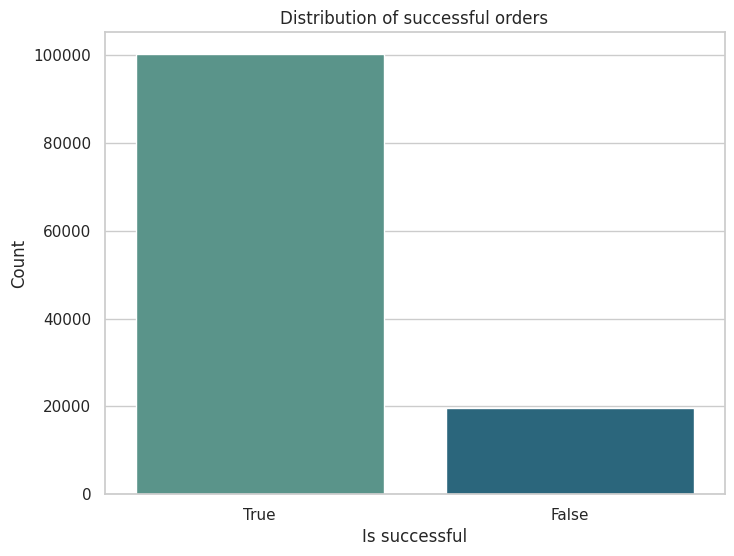

In [82]:
counts = df['is_successful'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is successful')
plt.ylabel('Count')
plt.title('Distribution of successful orders')
plt.show()

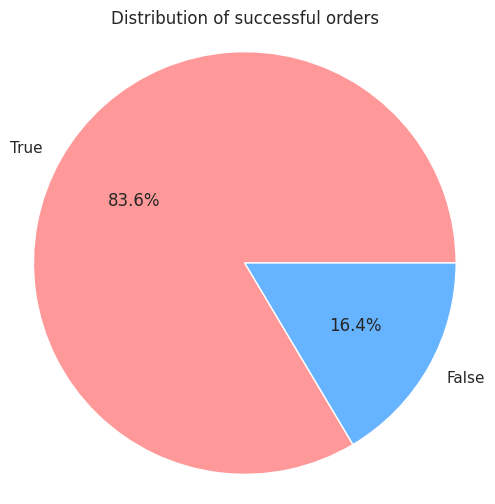

In [83]:
custom_colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', colors=custom_colors)
plt.axis('equal')
plt.title('Distribution of successful orders')
plt.show()

<ipython-input-84-78a9059d4d9b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




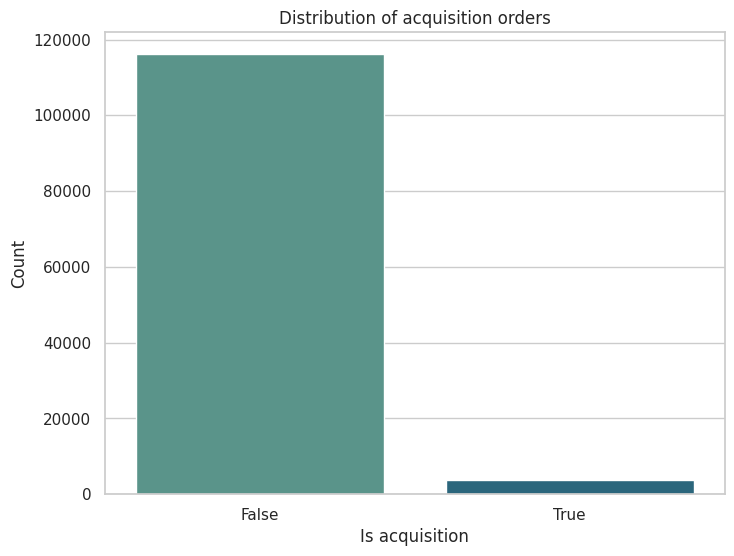

In [84]:
counts = df['is_acquisition'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Is acquisition')
plt.ylabel('Count')
plt.title('Distribution of acquisition orders')
plt.show()

<ipython-input-85-0534b23e154f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




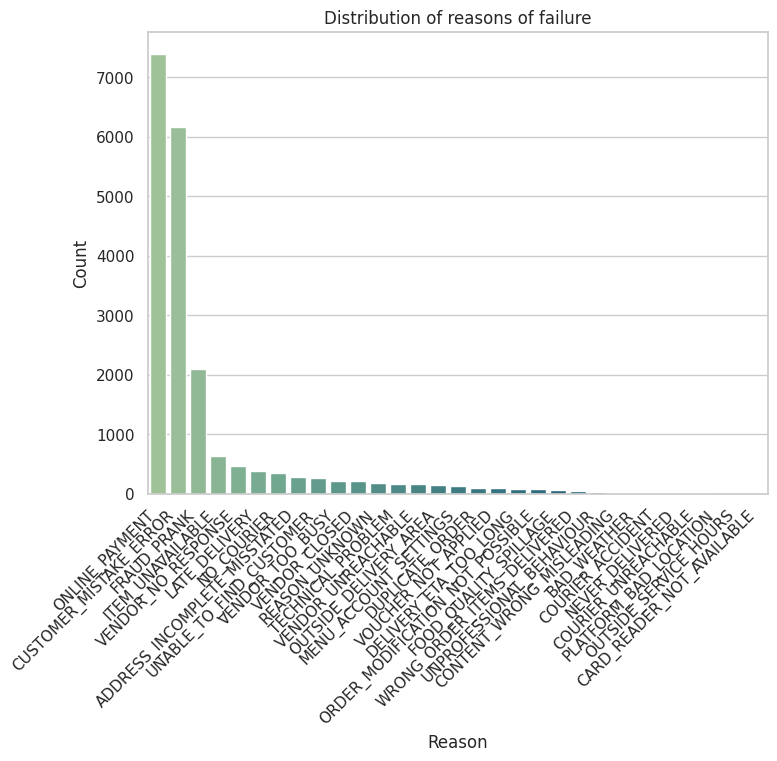

In [85]:
counts = df['reason'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of reasons of failure')
plt.show()

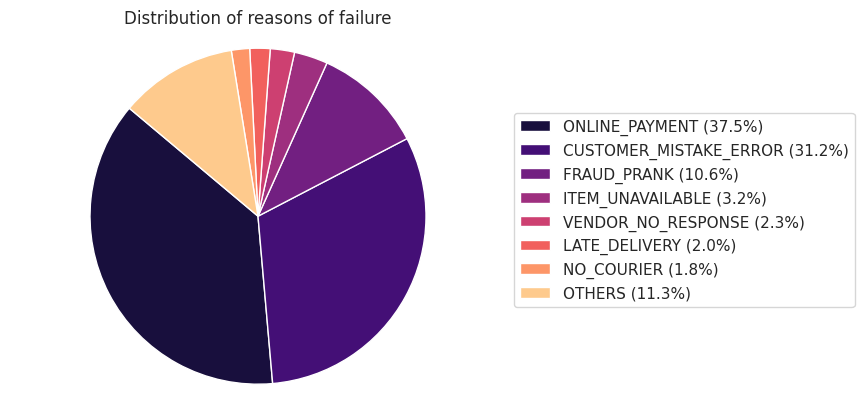

In [86]:
counts = df['reason'].value_counts()
filtered_counts = counts[counts / counts.sum() >= 0.015]
other_count = counts[counts / counts.sum() < 0.015].sum()
filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(filtered_counts.index, filtered_counts.values/filtered_counts.values.sum()*100)]

plt.pie(filtered_counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of reasons of failure', loc='center')
plt.show()

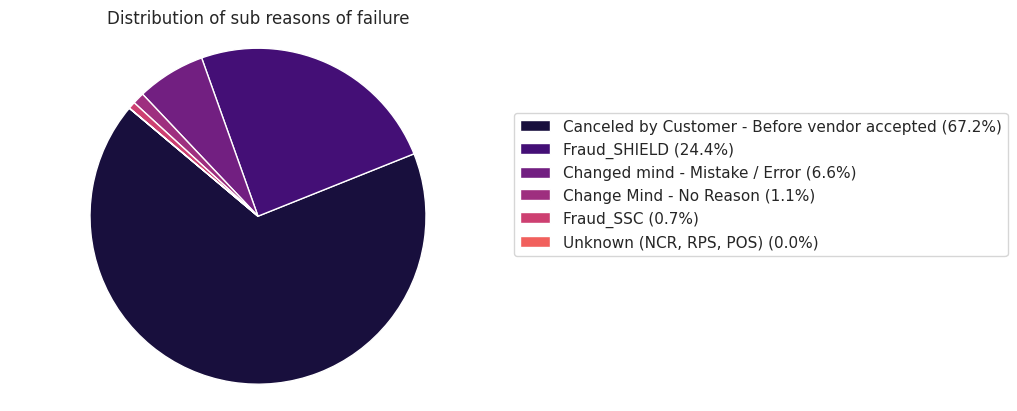

In [87]:
counts = df['sub_reason'].value_counts()
# filtered_counts = counts[counts / counts.sum() >= 0.015]
# other_count = counts[counts / counts.sum() < 0.015].sum()
# filtered_counts['OTHERS'] = other_count
custom_palette = sns.color_palette("magma", len(filtered_counts))

labels = ['{0} ({1:1.1f}%)'.format(i, j) for i, j in zip(counts.index, counts.values/counts.values.sum()*100)]

plt.pie(counts.values, labels=None, colors=custom_palette, startangle=140)
plt.axis('equal')

plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.8))
plt.title('Distribution of sub reasons of failure', loc='center')
plt.show()

<ipython-input-88-d1489263f32c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




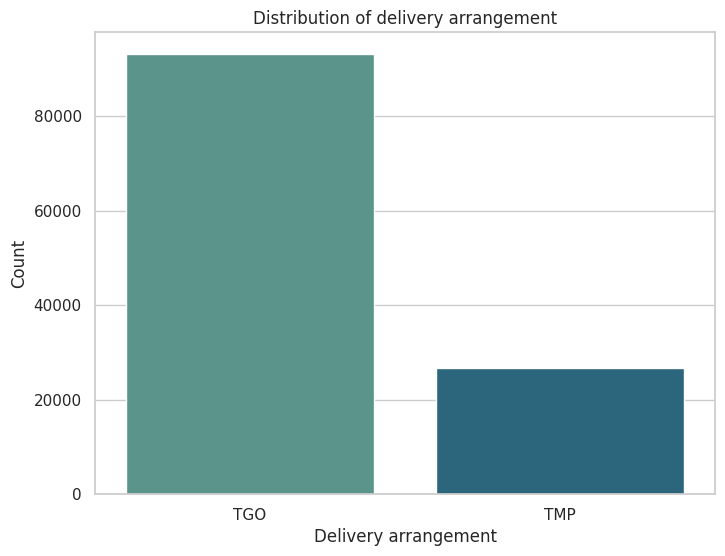

In [88]:
counts = df['delivery_arrangement'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Delivery arrangement')
plt.ylabel('Count')
plt.title('Distribution of delivery arrangement')
plt.show()

<ipython-input-89-5a0de3f98b2f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




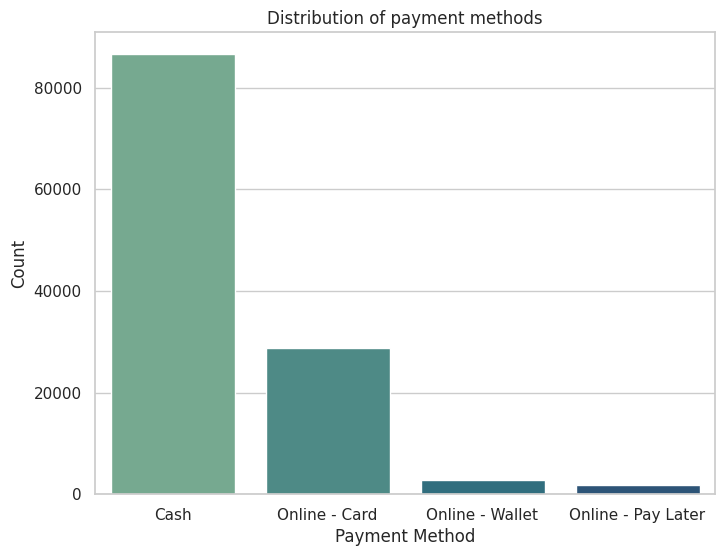

In [89]:
counts = df['Payment Method'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of payment methods')
plt.show()

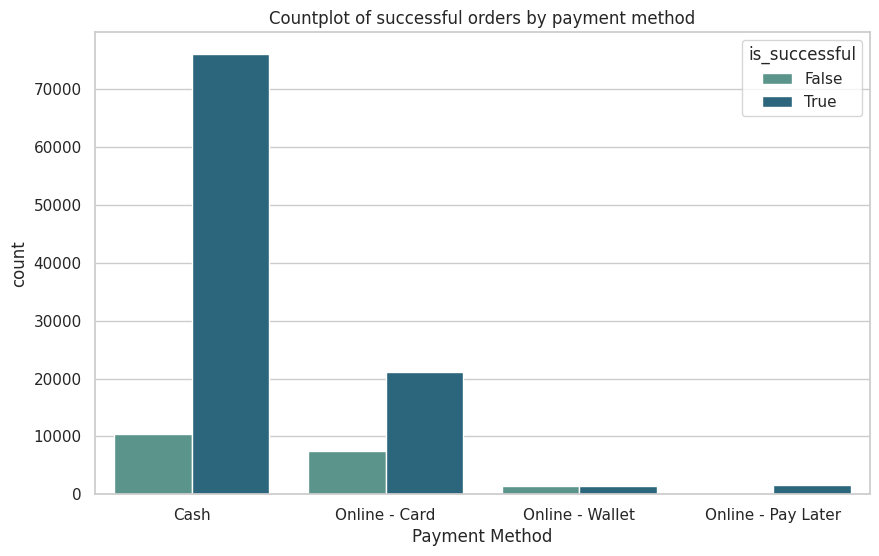

In [90]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Payment Method", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by payment method')
plt.show()

<ipython-input-91-f8b6103f8e5d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




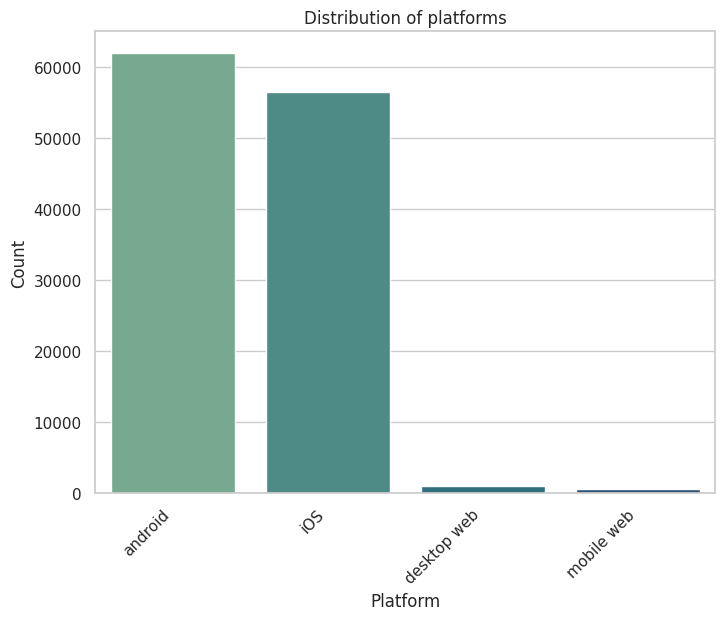

In [91]:
counts = df['platform'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of platforms')
plt.show()

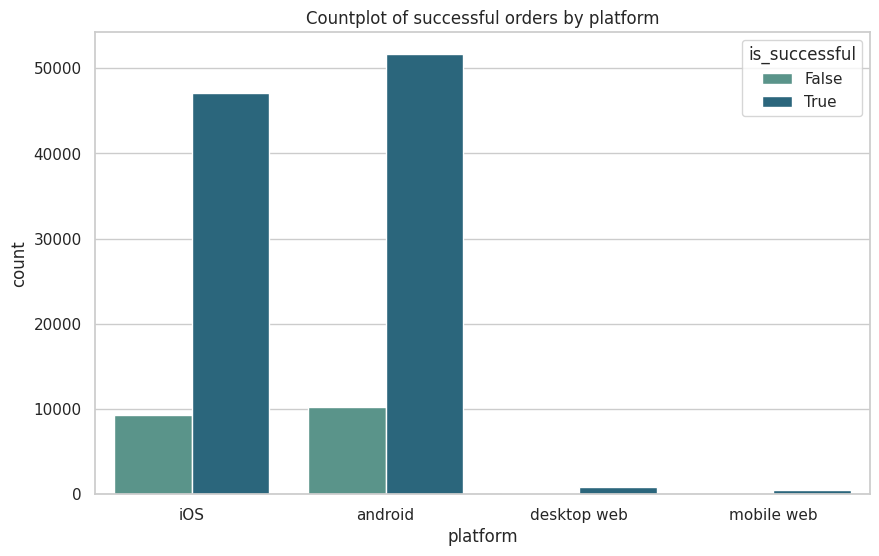

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="platform", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by platform')
plt.show()

<ipython-input-93-ea830571a6bc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




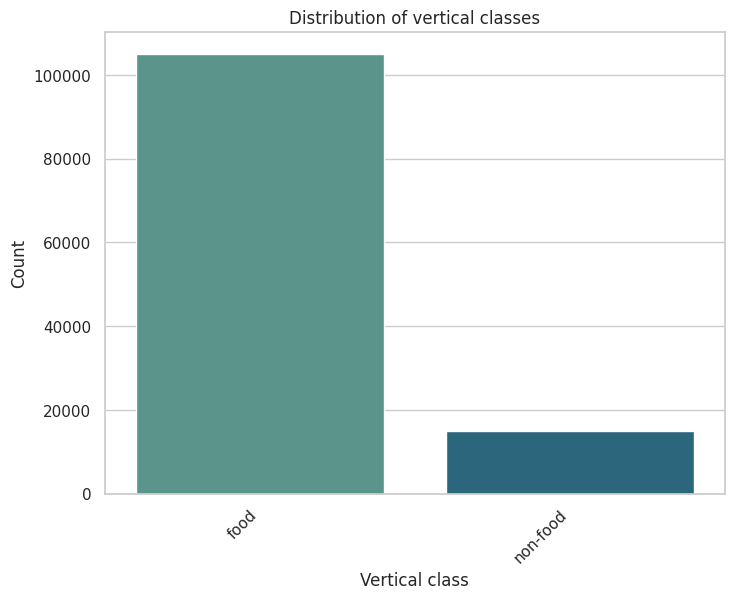

In [93]:
counts = df['vertical_class'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical classes')
plt.show()

<ipython-input-94-7ca80c3aa381>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




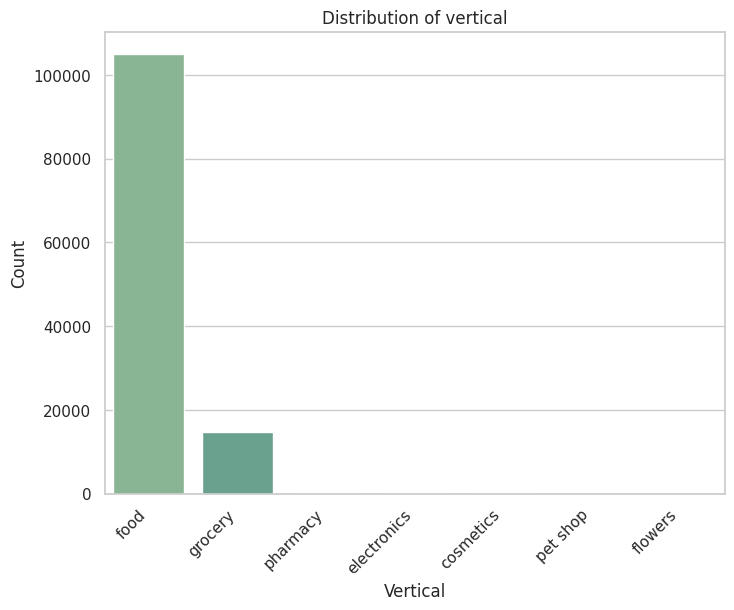

In [94]:
counts = df['vertical'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Vertical')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of vertical')
plt.show()

<ipython-input-95-45e8d1add5f6>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




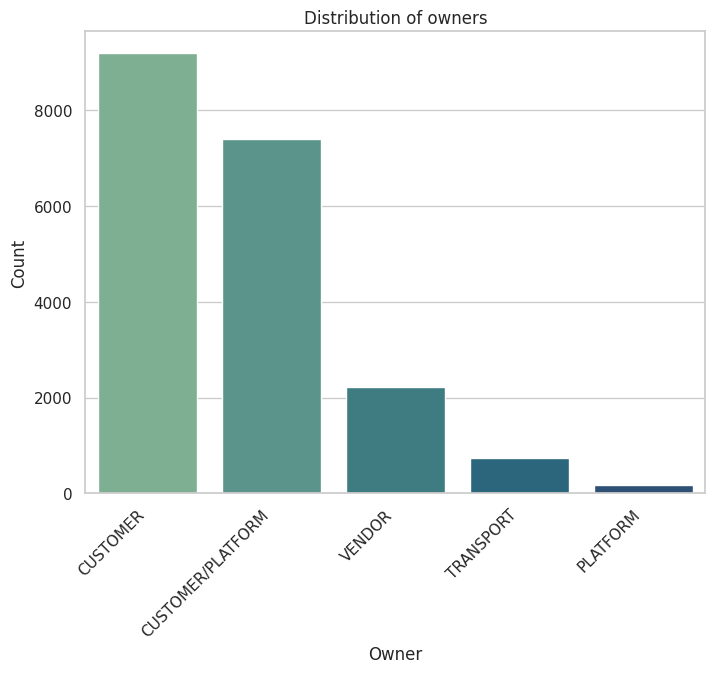

In [95]:
counts = df['owner'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Distribution of owners')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-96-092c374f96c2>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



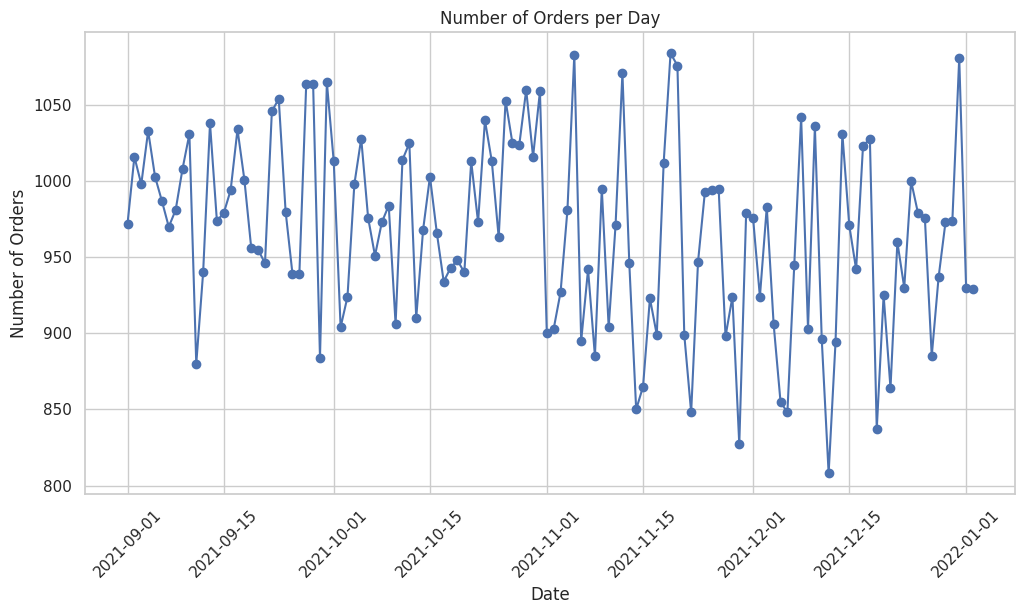

In [96]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['order_day'] = df['order_time'].dt.date
num_orders_per_day = df.groupby('order_day')['order_id'].count()
plt.figure(figsize=(12, 6))
plt.plot(num_orders_per_day.index, num_orders_per_day.values, marker='o', color='b', label='Number of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

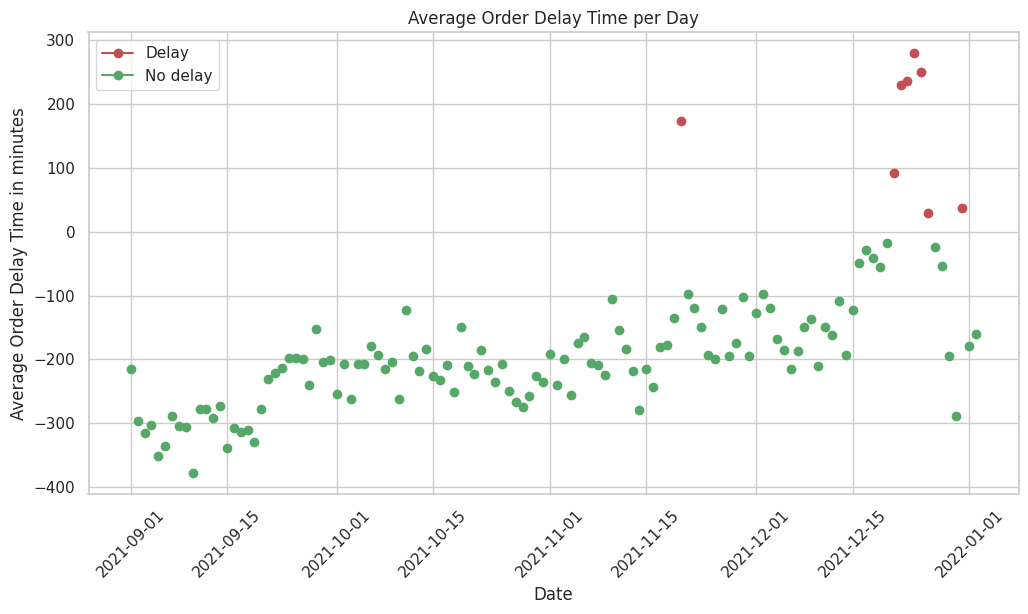

In [97]:
plt.figure(figsize=(12, 6))
avg_delay_per_day = df.groupby('order_day')['order_delay'].mean()
for day, value in avg_delay_per_day.items():
    color = 'r' if value > 0 else 'g'
    plt.plot(day, value, marker='o', color=color)
plt.xlabel('Date')
plt.ylabel('Average Order Delay Time in minutes')
plt.title('Average Order Delay Time per Day')
plt.xticks(rotation=45)
plt.plot([], marker='o', color='r', label='Delay')
plt.plot([], marker='o', color='g', label='No delay')
plt.legend()
plt.grid(True)
plt.show()

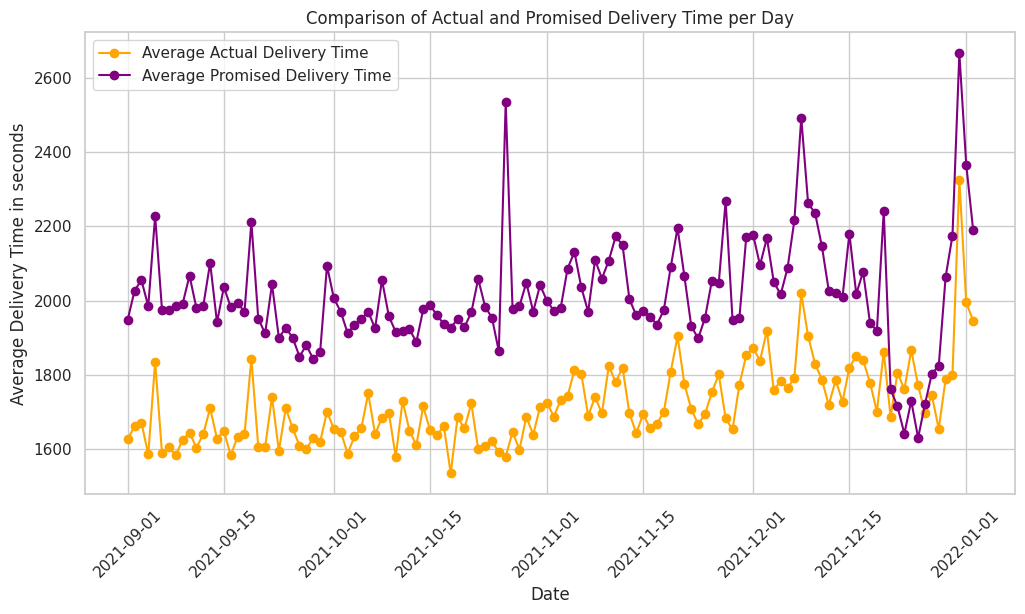

In [98]:
avg_actual_delivery_time_per_day = df.groupby('order_day')['actual_delivery_time'].mean()

# Calculate the average promised delivery time per day
avg_promised_delivery_time_per_day = df.groupby('order_day')['promised_delivery_time'].mean()

# Create a line graph comparing the two features per day
plt.figure(figsize=(12, 6))
plt.plot(avg_actual_delivery_time_per_day.index, avg_actual_delivery_time_per_day.values, marker='o', color='orange', label='Average Actual Delivery Time')
plt.plot(avg_promised_delivery_time_per_day.index, avg_promised_delivery_time_per_day.values, marker='o', color='purple', label='Average Promised Delivery Time')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time in seconds')
plt.title('Comparison of Actual and Promised Delivery Time per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-99-c4bf52b4f1ed>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




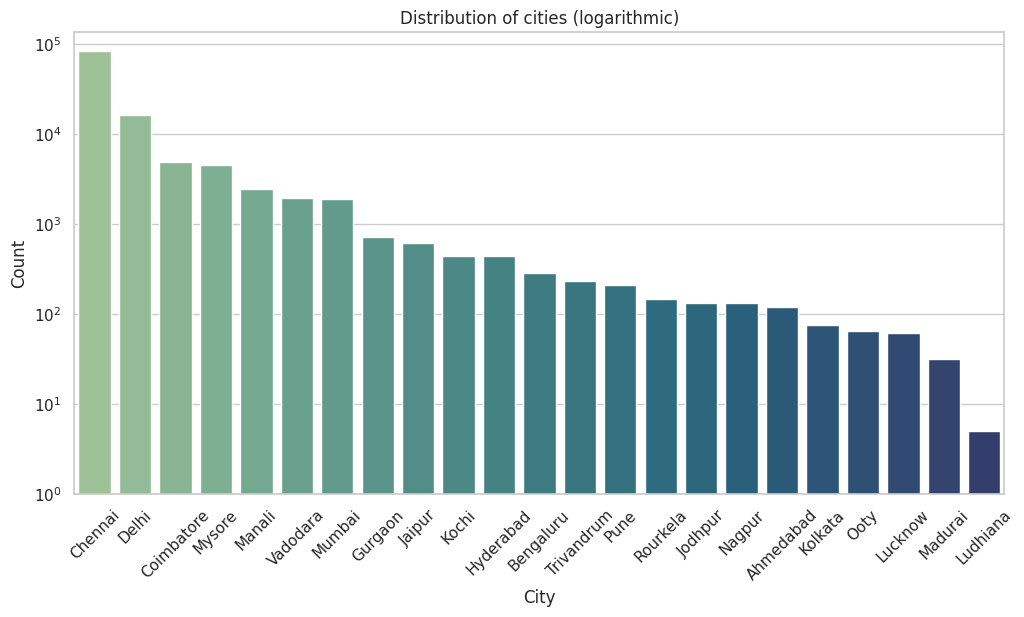

In [99]:
counts = df['City'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values, palette = 'crest')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of cities (logarithmic)')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.ylim(1, None)  # Set the minimum y-axis limit to 1
plt.xticks(rotation=45)
plt.show()

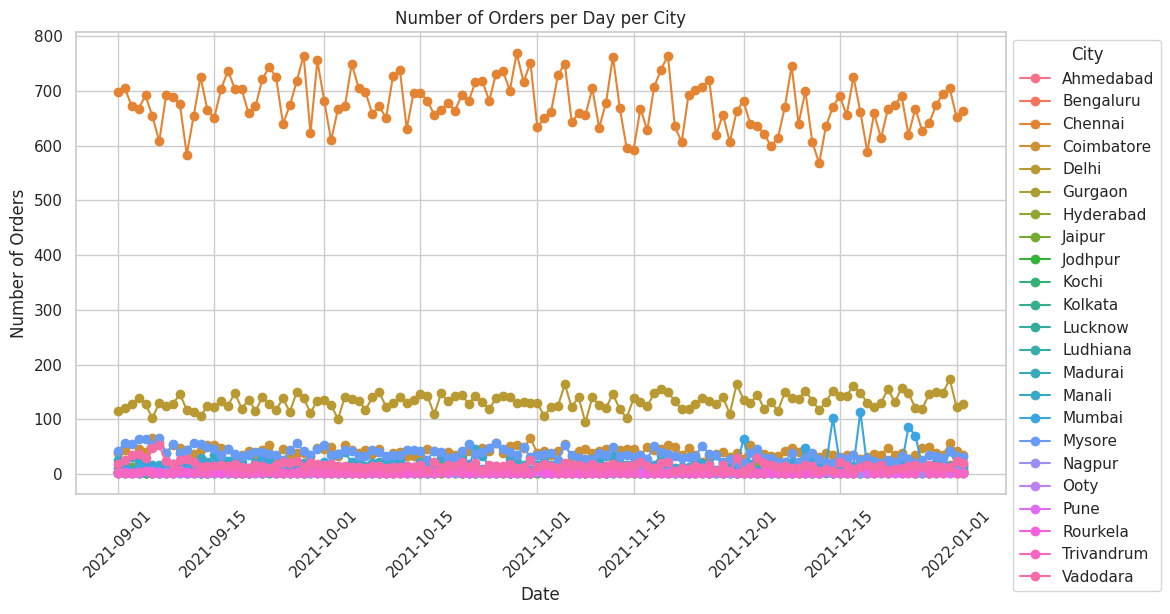

In [100]:
orders_per_day_per_city = df.groupby(['order_day', 'City']).size().unstack()

plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(orders_per_day_per_city.columns))

for i, city in enumerate(orders_per_day_per_city.columns):
    plt.plot(orders_per_day_per_city.index, orders_per_day_per_city[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

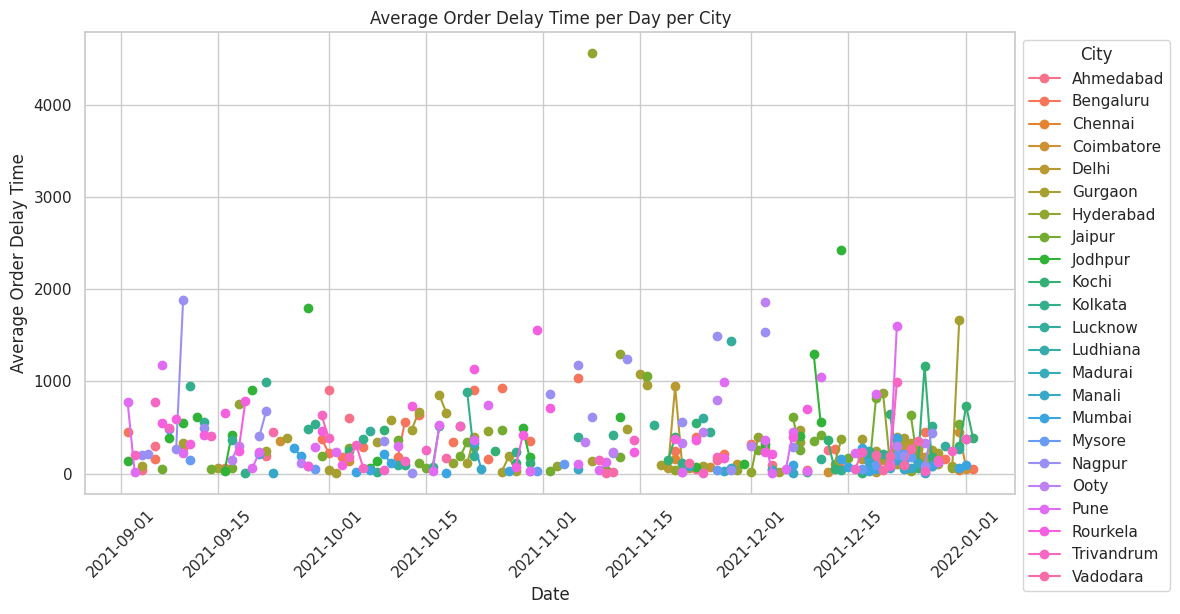

In [101]:
avg_delay_per_day_per_city = df.groupby(['order_day', 'City'])['order_delay'].mean().unstack()
avg_delay_per_day_per_city_filtered = avg_delay_per_day_per_city[avg_delay_per_day_per_city > 0]
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', n_colors=len(avg_delay_per_day_per_city.columns))
for i, city in enumerate(avg_delay_per_day_per_city_filtered.columns):
    plt.plot(avg_delay_per_day_per_city_filtered.index, avg_delay_per_day_per_city_filtered[city], marker='o', label=city, color=colors[i])

plt.xlabel('Date')
plt.ylabel('Average Order Delay Time')
plt.title('Average Order Delay Time per Day per City')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

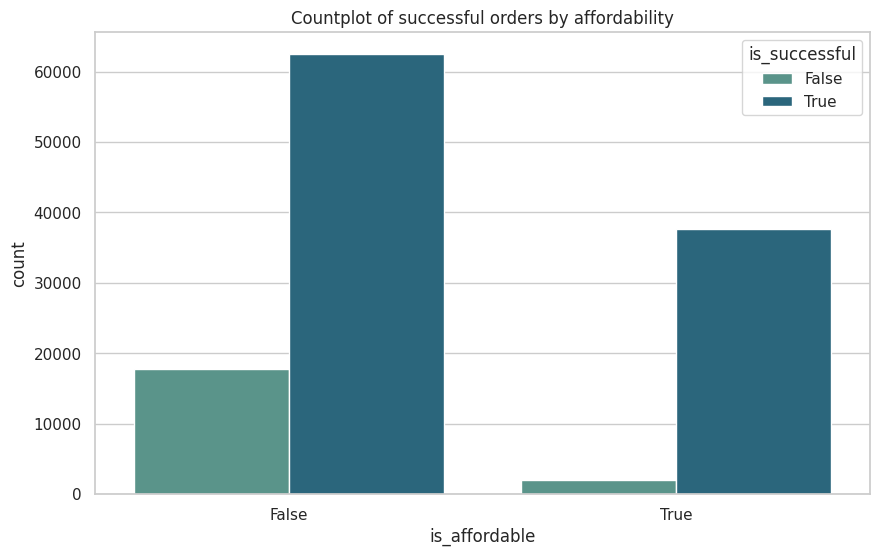

In [102]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="is_affordable", hue="is_successful", data=df, palette = 'crest')
plt.title('Countplot of successful orders by affordability')
plt.show()

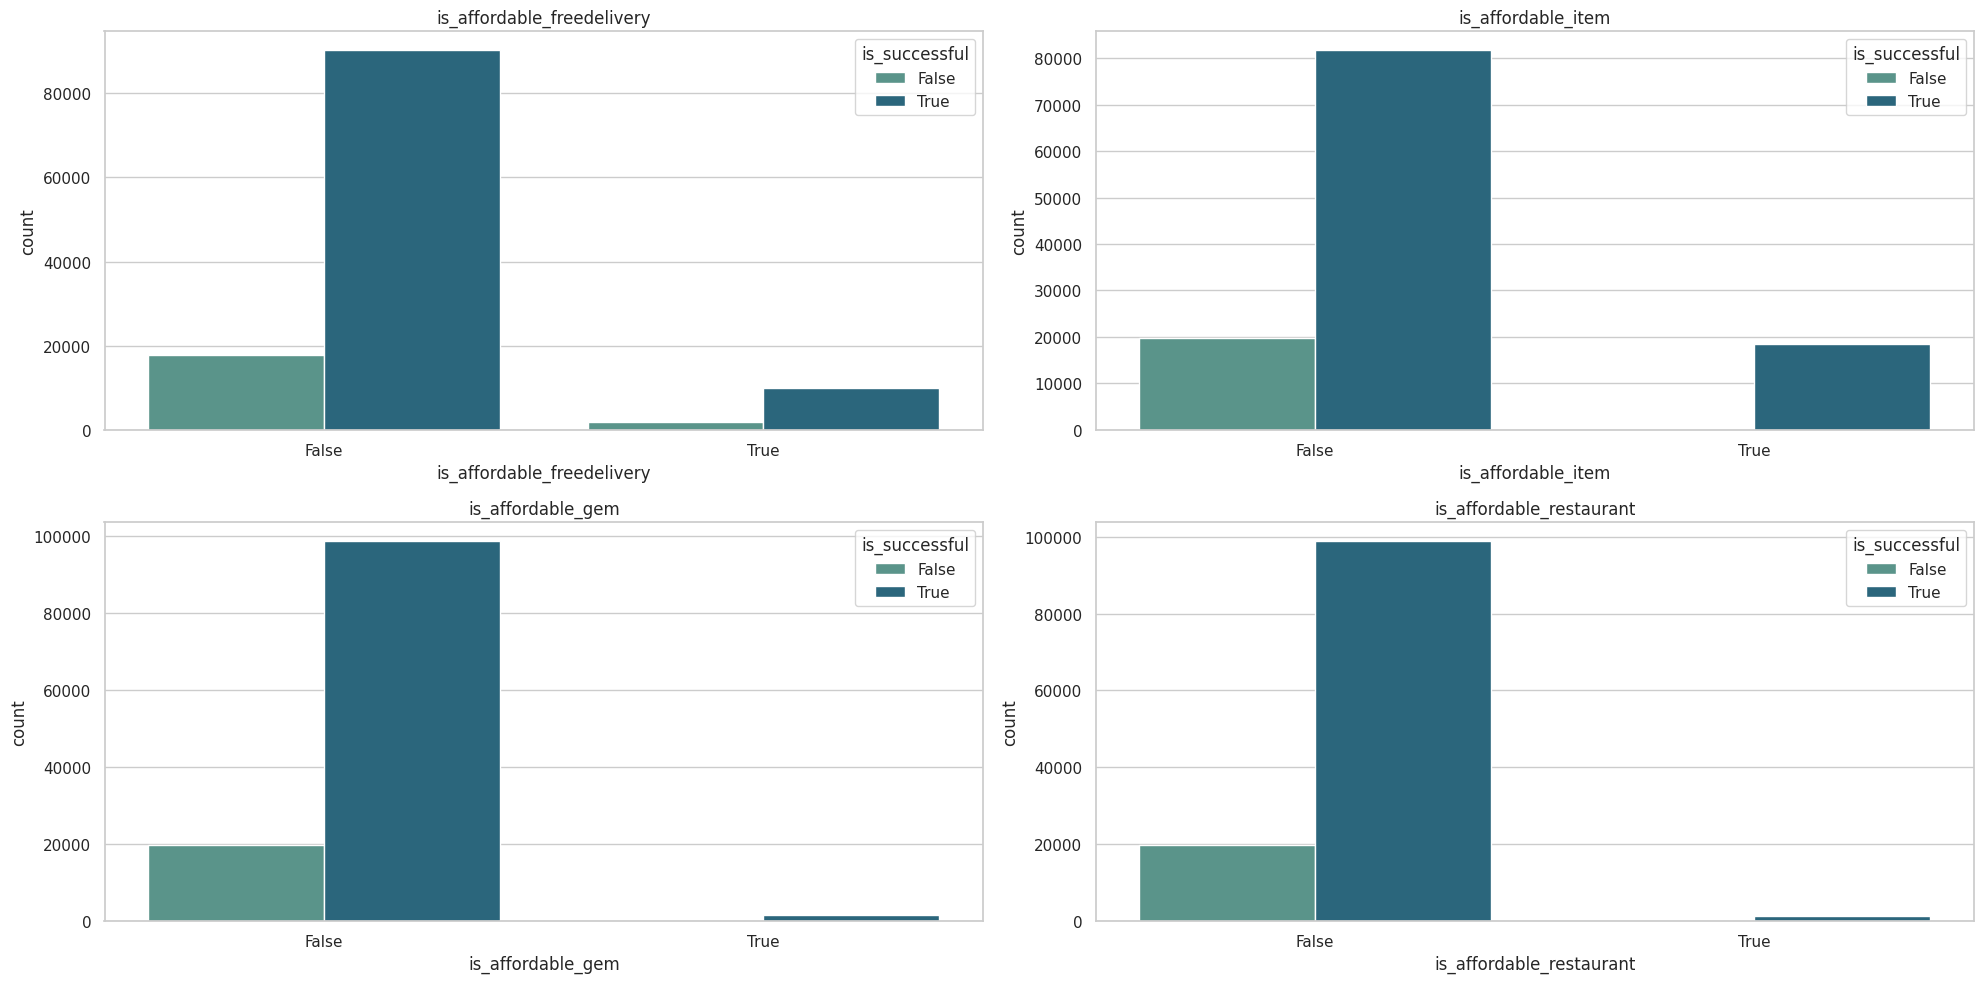

In [103]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

plt.subplot(221)
sns.countplot(x="is_affordable_freedelivery", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_freedelivery')

plt.subplot(222)
sns.countplot(x="is_affordable_item", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_item')

plt.subplot(223)
sns.countplot(x="is_affordable_gem", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_gem')

plt.subplot(224)
sns.countplot(x="is_affordable_restaurant", hue="is_successful", data=df, palette='crest')
plt.title('is_affordable_restaurant')

plt.tight_layout()
plt.show()

In [104]:
import plotly.express as px

In [105]:
city_coordinates = {
    'Ahmedabad': {'lat': 23.0225, 'lon': 72.5714},
    'Bengaluru': {'lat': 12.9716, 'lon': 77.5946},
    'Chennai': {'lat': 13.0827, 'lon': 80.2707},
    'Coimbatore': {'lat': 11.0168, 'lon': 76.9558},
    'Delhi': {'lat': 28.6139, 'lon': 77.209},
    'Gurgaon': {'lat': 28.4595, 'lon': 77.0266},
    'Hyderabad': {'lat': 17.385, 'lon': 78.4867},
    'Jaipur': {'lat': 26.9124, 'lon': 75.7873},
    'Jodhpur': {'lat': 26.2389, 'lon': 73.0243},
    'Kochi': {'lat': 9.9312, 'lon': 76.2673},
    'Kolkata': {'lat': 22.5726, 'lon': 88.3639},
    'Lucknow': {'lat': 26.8467, 'lon': 80.9462},
    'Ludhiana': {'lat': 30.901, 'lon': 75.8573},
    'Madurai': {'lat': 9.9252, 'lon': 78.1198},
    'Manali': {'lat': 32.2396, 'lon': 77.1887},
    'Mumbai': {'lat': 19.076, 'lon': 72.8777},
    'Mysore': {'lat': 12.2958, 'lon': 76.6394},
    'Nagpur': {'lat': 21.1458, 'lon': 79.0882},
    'Ooty': {'lat': 11.4067, 'lon': 76.6932},
    'Pune': {'lat': 18.5204, 'lon': 73.8567},
    'Rourkela': {'lat': 22.2587, 'lon': 84.9011},
    'Trivandrum': {'lat': 8.5241, 'lon': 76.9366},
    'Vadodara': {'lat': 22.3072, 'lon': 73.1812}
}

# Calculate the number of orders per city
orders_per_city = df.groupby('City')['order_id'].count().reset_index()
orders_per_city.columns = ['City', 'Number_of_Orders']

# Add latitude and longitude coordinates to the DataFrame
orders_per_city['lat'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lat'])
orders_per_city['lon'] = orders_per_city['City'].apply(lambda x: city_coordinates[x]['lon'])

# Create a scatter map for the number of orders per city in India using Plotly Express
fig = px.scatter_mapbox(orders_per_city, lat="lat", lon="lon", hover_name="City", hover_data=["Number_of_Orders"],
                        size="Number_of_Orders", color="Number_of_Orders", size_max=50,
                        mapbox_style="carto-positron", zoom=4, title='Number of Orders per City in India')
fig.show()

PREPROCESSING

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [107]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [108]:
df = pd.read_csv('/content/food_delivery.csv')

In [109]:
df = df.drop('analytical_customer_id', axis = 1)

In [110]:
df = df.drop('reason', axis = 1)

In [111]:
df = df.drop('sub_reason', axis = 1)

In [112]:
df = df.drop('order_id', axis = 1)

In [113]:
df = df.drop('order_time', axis = 1)

In [114]:
df = df.drop('owner', axis = 1)

In [115]:
df = df.drop('is_acquisition', axis = 1)

In [116]:
df = df.drop('actual_delivery_time', axis = 1)

In [117]:
df = df.drop('order_delay', axis = 1)

In [118]:
# Handle Missing Values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Convert columns to numeric, handling string values with commas
def clean_float_value(val):
    if isinstance(val, str):
        return float(val.replace(',', '.'))
    return val
columns_to_clean = ['dropoff_distance_manhattan', 'delivery_fee_amount_lc', 'gmv_amount_lc', 'basket_amount_lc','affordability_amt_total']
for col in columns_to_clean:
    df[col] = df[col].apply(clean_float_value)

# Drop rows with NaN values in the target column 'is_successful'
df.dropna(inplace=True)

In [119]:
df.head()

,is_successful,delivery_arrangement,gmv_amount_lc,basket_amount_lc,delivery_fee_amount_lc,Payment Method,promised_delivery_time,dropoff_distance_manhattan,platform,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
7,True,TGO,154.99,152.00,2.99,Online - Card,2219.0,338.0,android,food,food,False,True,False,False,False,True,38.00,Chennai
8,True,TGO,134.99,130.00,4.99,Cash,2219.0,911.0,iOS,food,food,False,False,False,False,False,False,38.00,Chennai
9,True,TGO,476.99,472.00,4.99,Cash,2759.0,819.0,android,food,food,False,False,False,False,False,False,38.00,Chennai
10,True,TGO,49.99,40.00,9.99,Cash,1799.0,2144.0,iOS,food,food,False,False,False,False,False,False,38.00,Chennai
11,True,TGO,127.24,107.25,19.99,Cash,2279.0,5866.0,android,food,food,False,True,False,False,False,True,6.75,Chennai


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119878 entries, 7 to 119884
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   is_successful               119878 non-null  bool   
 1   delivery_arrangement        119878 non-null  object 
 2   gmv_amount_lc               119878 non-null  float64
 3   basket_amount_lc            119878 non-null  float64
 4   delivery_fee_amount_lc      119878 non-null  float64
 5   Payment Method              119878 non-null  object 
 6   promised_delivery_time      119878 non-null  float64
 7   dropoff_distance_manhattan  119878 non-null  float64
 8   platform                    119878 non-null  object 
 9   vertical_class              119878 non-null  object 
 10  vertical                    119878 non-null  object 
 11  is_affordable_freedelivery  119878 non-null  bool   
 12  is_affordable_item          119878 non-null  bool   
 13  is_affordable_gem  

In [121]:
# Check unique values in each categorical column before one-hot encoding
categorical_cols_to_encode = ['platform','vertical_class', 'vertical', 'City', 'Payment Method', 'delivery_arrangement']
for col in categorical_cols_to_encode:
    print(f"Unique values in {col}: {df[col].unique()}")

# One-Hot Encoding for categorical columns with string values
for col in categorical_cols_to_encode:
    if df[col].dtype == 'object':
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        df.drop(col, axis=1, inplace=True)

Unique values in platform: ['android' 'iOS' 'desktop web' 'mobile web']
Unique values in vertical_class: ['food' 'non-food']
Unique values in vertical: ['food' 'grocery' 'pharmacy' 'electronics' 'cosmetics' 'pet shop'
 'flowers']
Unique values in City: ['Chennai' 'Mysore' 'Delhi' 'Vadodara' 'Mumbai' 'Kolkata' 'Coimbatore'
 'Trivandrum' 'Ahmedabad' 'Jaipur' 'Pune' 'Manali' 'Bengaluru' 'Kochi'
 'Hyderabad' 'Lucknow' 'Jodhpur' 'Gurgaon' 'Nagpur' 'Madurai' 'Rourkela'
 'Ooty' 'Ludhiana']
Unique values in Payment Method: ['Online - Card' 'Cash' 'Online - Wallet' 'Online - Pay Later']
Unique values in delivery_arrangement: ['TGO' 'TMP']


In [122]:
# Separate features and target variable
X = df.drop('is_successful', axis=1)
y = df['is_successful']
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [123]:
len(X_train.columns)

54

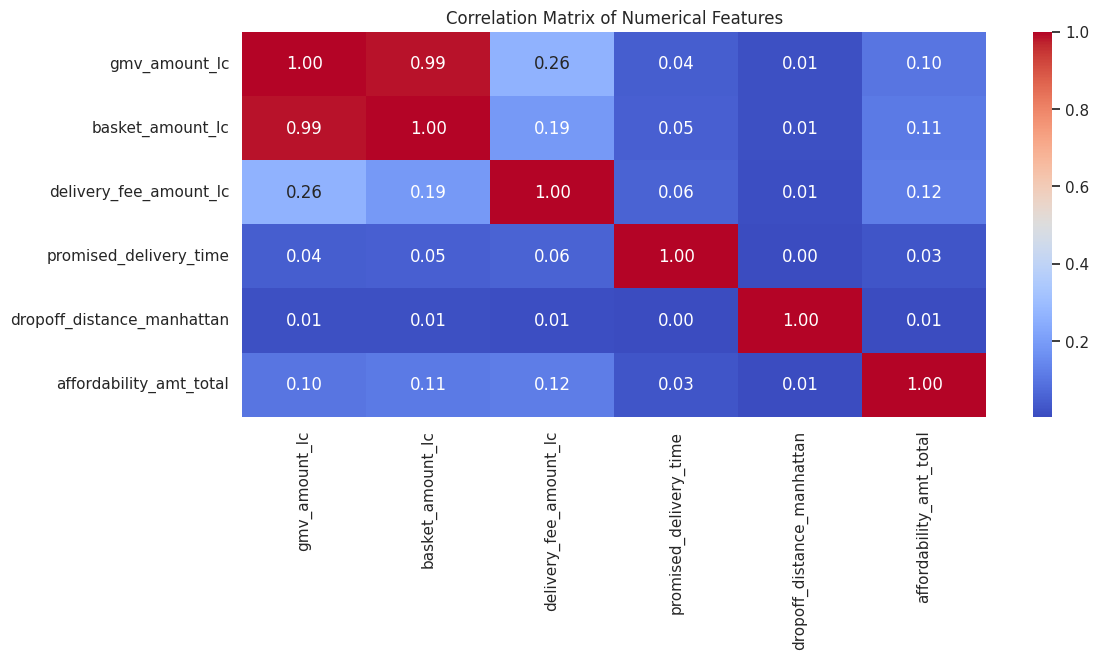

In [125]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [48]:
# Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Random Forest Classifier: 99.37%
Precision: 0.99


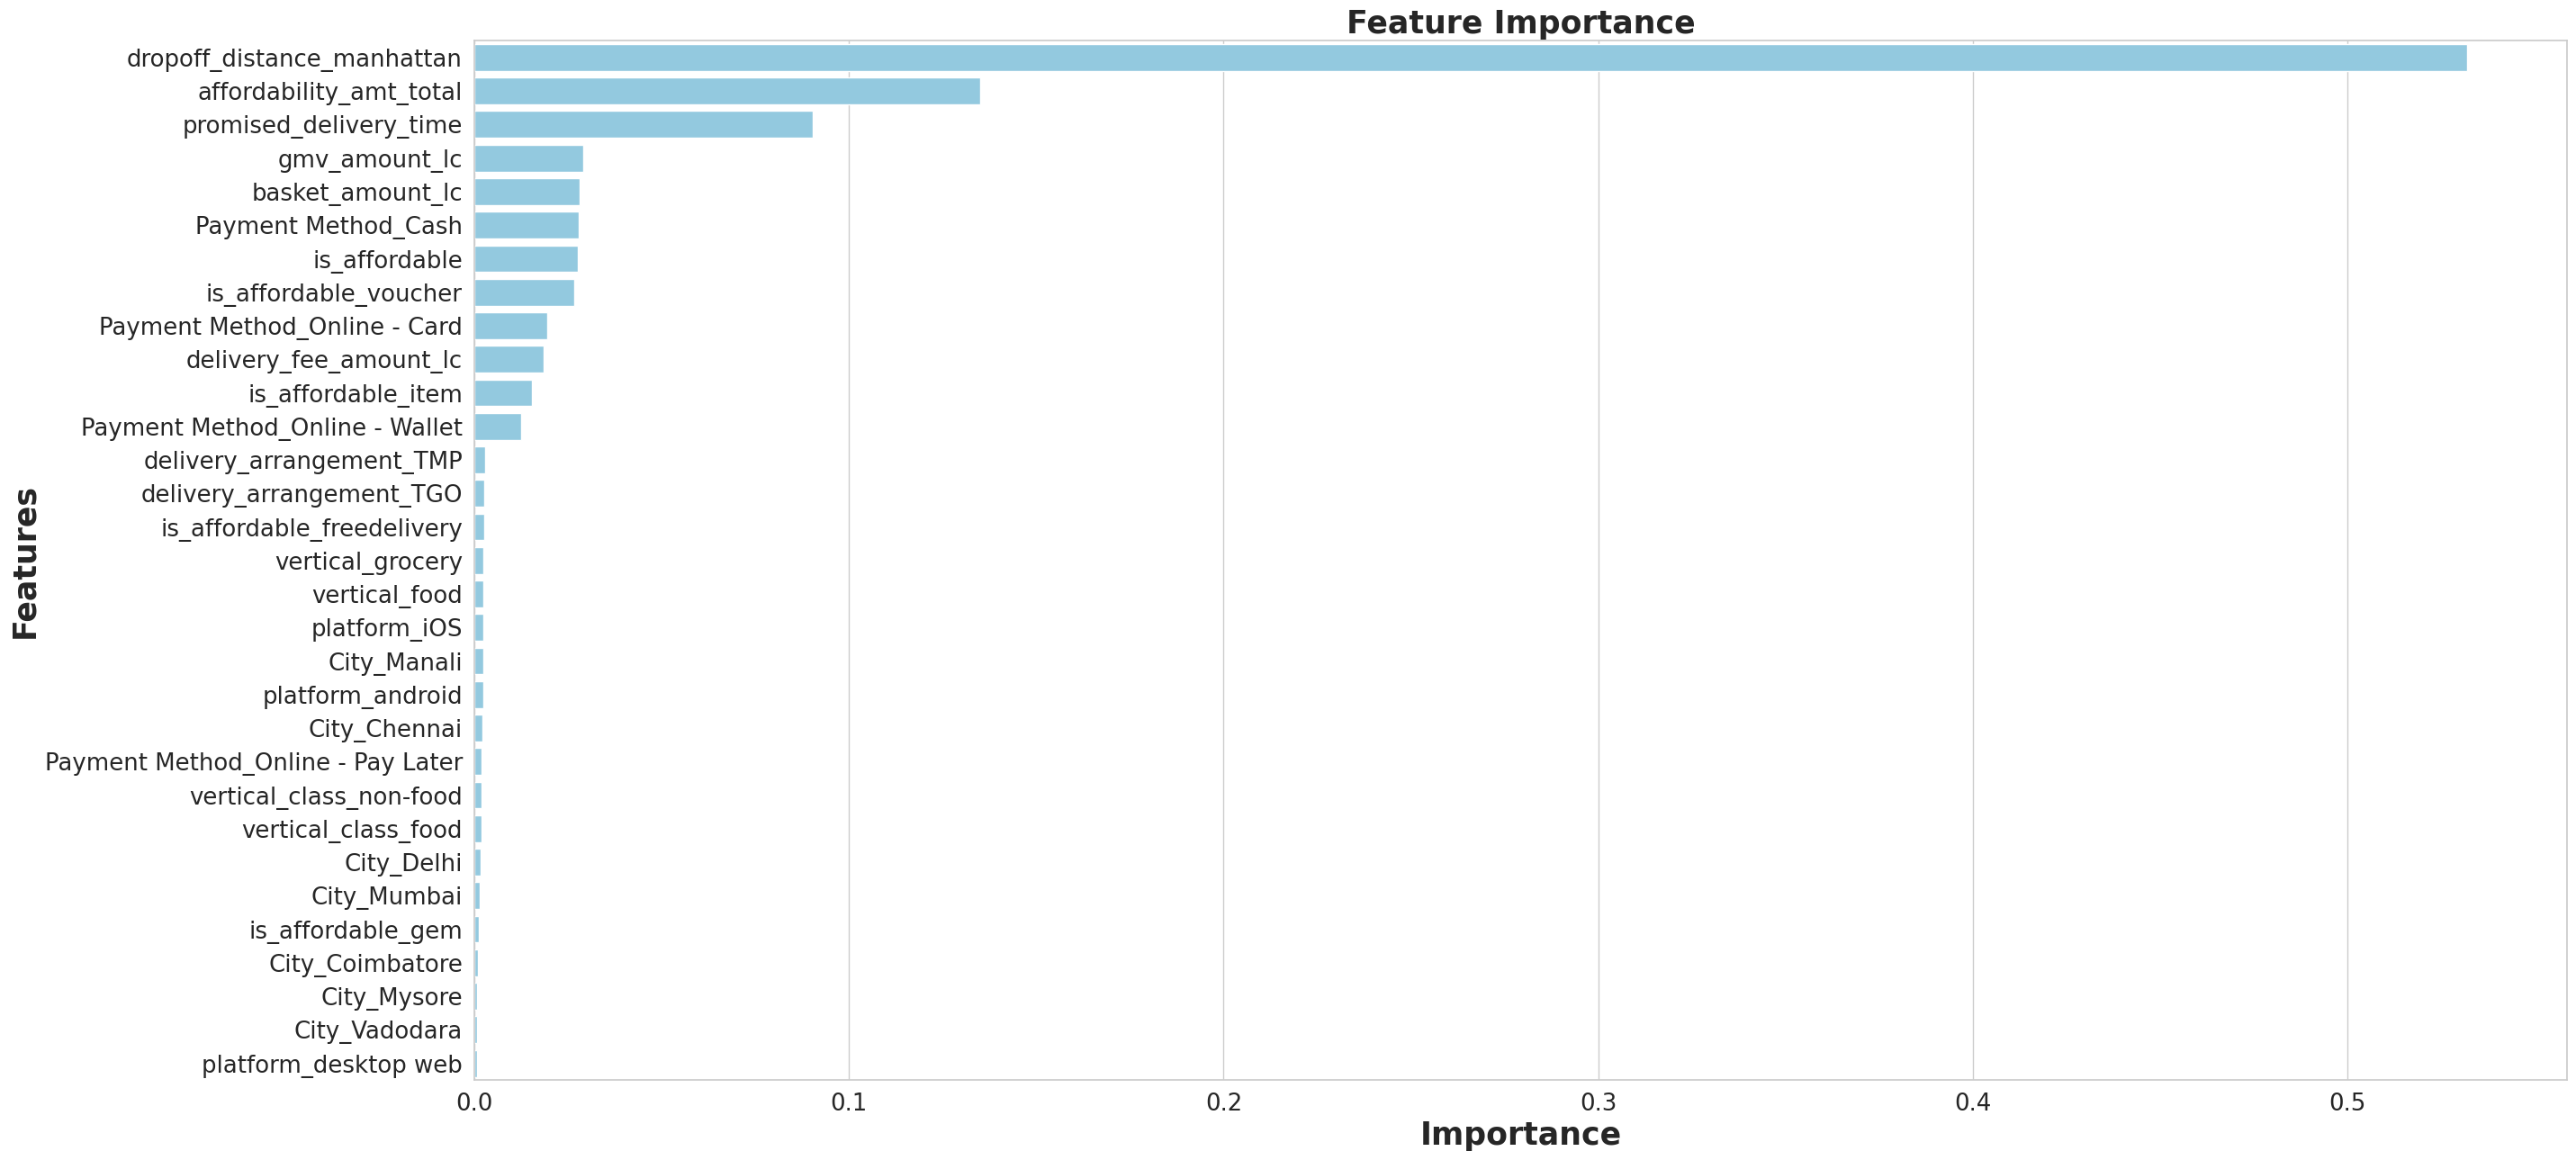

In [49]:
feats = {}
for feature, importance in zip(X_train.columns, rf_model.feature_importances_):
    if importance > 0.0005:  # Filter features with non-zero importance
        feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set(style="whitegrid", font_scale=1.7)
fig, ax = plt.subplots(figsize=(30, 15))

sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight='bold')
plt.ylabel('Features', fontsize=25, weight='bold')
plt.title('Feature Importance', fontsize=25, weight='bold')

plt.show()

In [50]:
# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [51]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(X_val)

# Calculate the accuracy of the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val * 100:.2f}%")

# Get predicted probabilities for the positive class
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy on Validation Set: 99.34%
Precision: 0.99


In [56]:
from sklearn.linear_model import LogisticRegression

# Создание модели логистической регрессии
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = lr_model.predict(X_test)

# Рассчет точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Logistic Regression: 85.95%
Precision: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gradient Boosting Classifier: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Gradient Boosting Classifier: 99.22%
Precision: 0.99


In [126]:
df_nb = df.drop('basket_amount_lc', axis = 1)

In [127]:
df_nb.head()

,is_successful,gmv_amount_lc,delivery_fee_amount_lc,promised_delivery_time,dropoff_distance_manhattan,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,platform_android,platform_desktop web,platform_iOS,platform_mobile web,vertical_class_food,vertical_class_non-food,vertical_cosmetics,vertical_electronics,vertical_flowers,vertical_food,vertical_grocery,vertical_pet shop,vertical_pharmacy,City_Ahmedabad,City_Bengaluru,City_Chennai,City_Coimbatore,City_Delhi,City_Gurgaon,City_Hyderabad,City_Jaipur,City_Jodhpur,City_Kochi,City_Kolkata,City_Lucknow,City_Ludhiana,City_Madurai,City_Manali,City_Mumbai,City_Mysore,City_Nagpur,City_Ooty,City_Pune,City_Rourkela,City_Trivandrum,City_Vadodara,Payment Method_Cash,Payment Method_Online - Card,Payment Method_Online - Pay Later,Payment Method_Online - Wallet,delivery_arrangement_TGO,delivery_arrangement_TMP
7,True,154.99,2.99,2219.0,338.0,False,True,False,False,False,True,38.00,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
8,True,134.99,4.99,2219.0,911.0,False,False,False,False,False,False,38.00,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
9,True,476.99,4.99,2759.0,819.0,False,False,False,False,False,False,38.00,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
10,True,49.99,9.99,1799.0,2144.0,False,False,False,False,False,False,38.00,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
11,True,127.24,19.99,2279.0,5866.0,False,True,False,False,False,True,6.75,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


In [128]:
X_nb = df_nb.drop('is_successful', axis=1)
y_nb = df_nb['is_successful']
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, shuffle=True, random_state=42)

In [129]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

y_pred_nb = nb_model.predict(X_test_nb)

accuracy = accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy of Naive Bayes Classifier: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Naive Bayes Classifier: 38.04%
Precision: 0.97


In [130]:
df_bn = df.drop('gmv_amount_lc', axis = 1)

In [131]:
X_bn = df_bn.drop('is_successful', axis=1)
y_bn = df_bn['is_successful']
X_train_bn, X_test_bn, y_train_bn, y_test_bn = train_test_split(X_bn, y_bn, test_size=0.2, shuffle=True, random_state=42)

In [133]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_bn, y_train_bn)

y_pred_bn = nb_model.predict(X_test_bn)

accuracy = accuracy_score(y_test_bn, y_pred_bn)
print("Accuracy of Naive Bayes Classifier: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Naive Bayes Classifier: 37.99%
Precision: 0.97


In [134]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Support Vector Machine Classifier: {:.2f}%".format(accuracy * 100))

Accuracy of Support Vector Machine Classifier: 83.60%


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Support Vector Machine Classifier: {:.2f}%".format(accuracy * 100))
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precision: {precision:.2f}")

Accuracy of Support Vector Machine Classifier: 83.60%
Precision: 0.84
